# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [1]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    if f(x0) == 0:
        return x0, 0
    xprev = x0
    xnext = xprev - f(xprev) / fder(xprev)
    n = 1
    while abs(xprev - xnext) > eps and n <= maxiter:
        xprev = xnext
        xnext = xprev - f(xprev) / fder(xprev)
        n+=1
    return xnext, n 

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [2]:
f = lambda x: x**2 - 1
g = lambda x: 2 * x
x1, n1 = newton_iteration(f, g, -1e-6)
print('Первый корень равен %.5f,' % (x1), 'количество итераций - {}'.format(n1))
x2, n2 = newton_iteration(f, g, 100, eps=1e-10)
print('Второй корень равен %.10f,' % (x2), 'количество итераций - {}'.format(n2))

Первый корень равен -1.00000, количество итераций - 24
Второй корень равен 1.0000000000, количество итераций - 12


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [3]:
def newton_iteration_m(f, fder, m, x0, eps=1e-5, maxiter=1000):
    if f(x0) == 0:
        return x0, 0
    xprev = x0
    xnext = xprev - m * f(xprev) / fder(xprev)
    n = 1
    while abs(xprev - xnext) > eps and n <= maxiter:
        xprev = xnext
        xnext = xprev - m * f(xprev) / fder(xprev)
        n+=1
    return xnext, n 

In [4]:
f1 = lambda x: (x**2 - 1)**2
g1 = lambda x: 4 * (x**2 - 1) * x
for i in range(1, 6):
    xi, ni = newton_iteration_m(f1, g1, i, -1e-6, eps=1e-7)
    print('При m = {} для нахождения корня нужно {} итераций'.format(i, ni))

При m = 1 для нахождения корня нужно 67 итераций
При m = 2 для нахождения корня нужно 25 итераций
При m = 3 для нахождения корня нужно 30 итераций
При m = 4 для нахождения корня нужно 1001 итераций
При m = 5 для нахождения корня нужно 1001 итераций


Метод Ньютона для нахождения простого корня сходится с квадратичной скоростью. Из полученных результатов видно, что метод Ньютона для нахождения кратного корня лучше всего сходится при $m=2$, что совпадает с кратностью корня. Более того, в этом случае метод сходится с той же скоростью, что и метод для простого корня

Также важно отметить, что при $m=4, 5$ метод не может сойтись к корню при $x_0=-10^{-6}$

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

In [5]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


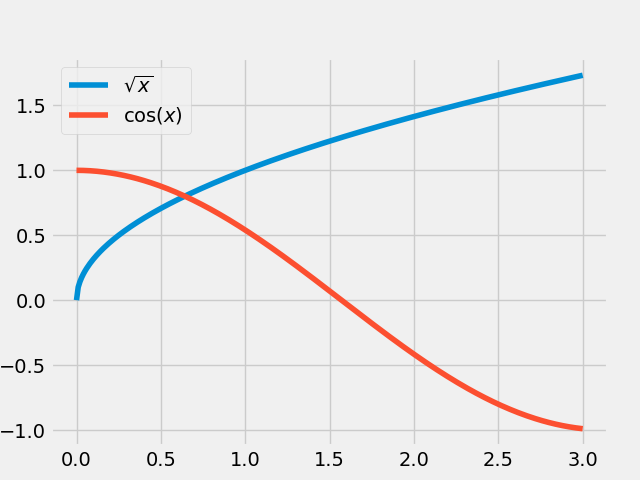

In [6]:
plt.style.use('fivethirtyeight')
x = np.linspace(0, 3, 300)
y1 = np.sqrt(x)
y2 = np.cos(x)
plt.figure()
plt.plot(x, y1, lw=4, label='$\sqrt{x}$')
plt.plot(x, y2, lw=4, label='$\cos(x)$')
plt.legend()

Из графиков функций видно, что корень уравнения лежит между $x_1=0.5$ и $x_2=0.8$

<IPython.core.display.Javascript object>


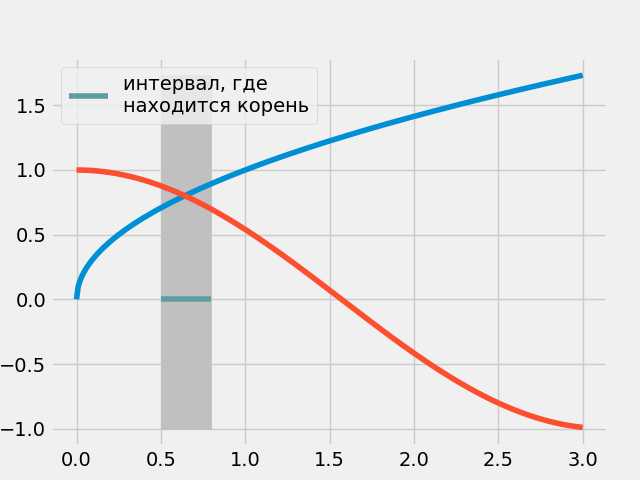

In [7]:
plt.figure()
plt.plot(x, y1, lw=4)
plt.plot(x, y2, lw=4)
plt.fill_betweenx(np.linspace(-1, 3**0.5, 500), 0.5, 0.8, color='#C0C0C0')
plt.plot([0.5, 0.8], [0, 0], '-', ms=3, color='#5F9EA0', label='интервал, где \nнаходится корень')
plt.legend()

In [8]:
# Функция для нахождения корня методом простой итерации
def simple_iteration(f, x0, alpha, eps=1e-5, maxiter=1000):
    if f(x0) == 0:
        return x0, 0
    xprev = x0
    xnext = xprev - alpha * f(xprev)
    n = 1
    while abs(xprev - xnext) > eps and n <= maxiter:
        xprev = xnext
        xnext = xprev - alpha * f(xprev)
        n+=1
    return xnext, n 

<IPython.core.display.Javascript object>


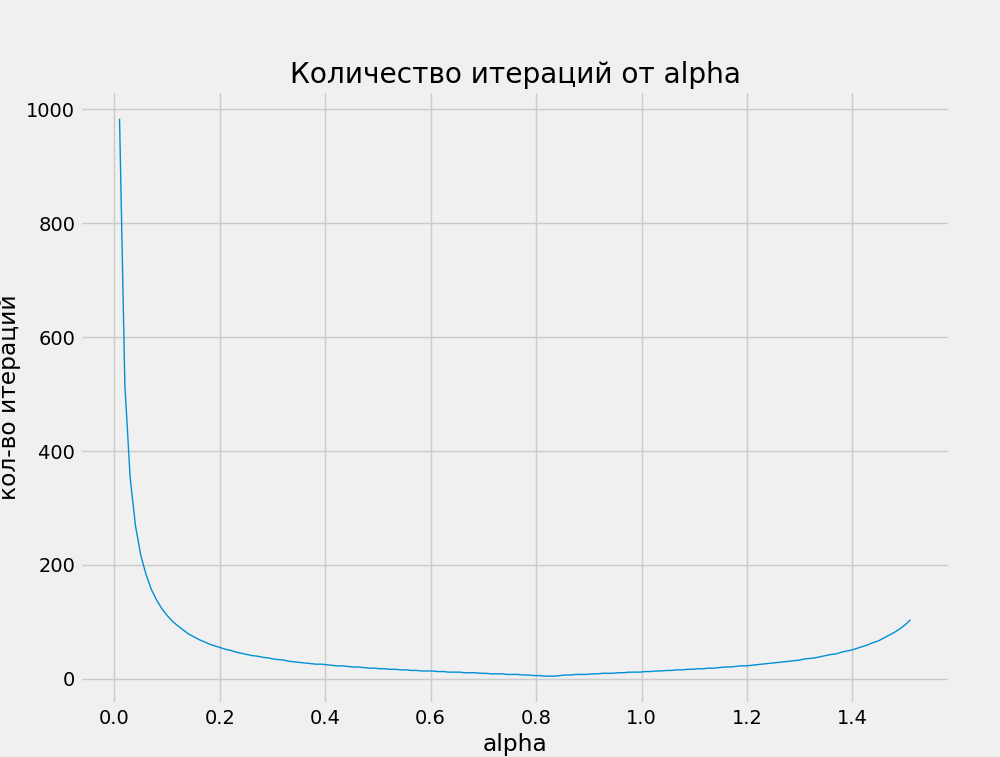

Text(0, 0.5, 'кол-во итераций')

In [10]:
h = lambda x: x**0.5 - np.cos(x)
alpha = np.linspace(0.01, 1.51, 150)
N = np.array([simple_iteration(h, 0.5, i, eps=1e-8)[1] for i in alpha])
plt.figure(figsize=(10, 10))
plt.plot(alpha, N, lw=1)
plt.title('Количество итераций от alpha')
plt.xlabel('alpha')
plt.ylabel('кол-во итераций')

$$f(x)=\sqrt{x}-\cos(x)\Rightarrow f'(x)=\frac{1}{2\sqrt{x}}+\sin(x)$$
$$M = max\big(f'(x)\big)=f'(x_2)\approx 1,28$$
$$m = min\big(f'(x)\big)=f'(x_1)\approx 1,19$$
$$\Rightarrow\alpha_{opt}=\frac{2}{m+M}\approx0,81$$

In [11]:
xo, no = simple_iteration(h, 0.5, 0.81, eps=1e-8)
print('Корень равен %.8f,' % (xo), 'количество итераций - {}'.format(no))

Корень равен 0.64171437, количество итераций - 5


Как видно из графика и последнего результата, при $\alpha_{opt}$ метод простой итерации действительно сходится быстрее всего

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

In [12]:
import cmath

In [13]:
def which_root(x0):
    f = lambda x: x**3 - 1
    g = lambda x: 3 * x**2
    x, _ = newton_iteration(f, g, x0, eps=1e-4, maxiter=10)
    r = abs(x - 1)
    g = abs(x - cmath.exp(1j * 2 * np.pi / 3))
    b = abs(x - cmath.exp(1j * 4 * np.pi / 3))
    if min(r, g, b) == r:
        return 0
    if min(r, g, b) == g:
        return 1
    if min(r, g, b) == b:
        return 2

<IPython.core.display.Javascript object>


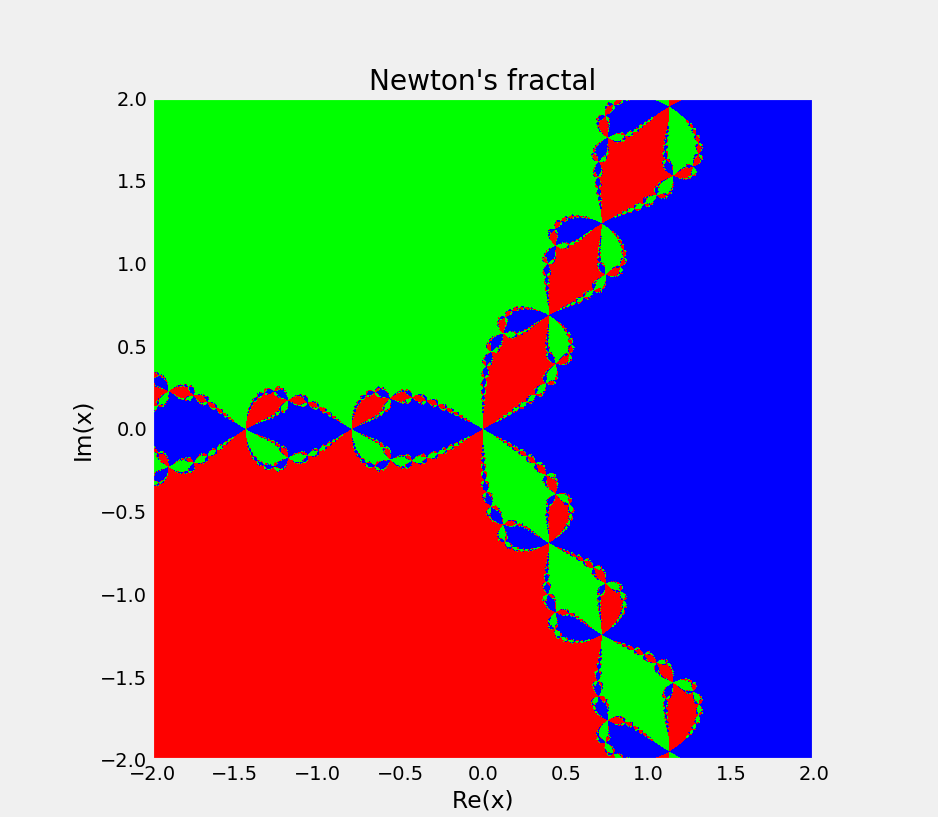

Text(0, 0.5, 'Im(x)')

In [15]:
plt.figure()
n = 4000
a = np.zeros((n, n))
for i in range(n):
    for k in range(n):
        if k != n // 2 or i != n // 2:
            a[k, i] = which_root(-2 + i * 4 / n + (-2 + k * 4 / n)*1j)
plt.imshow(a, extent=[-2, 2, -2, 2], cmap='brg')
plt.title("Newton's fractal")
plt.grid()
plt.xlabel('Re(x)')
plt.ylabel('Im(x)')